In [1]:
# Load packages

import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
import geopandas
import descartes
import matplotlib.pyplot as plt
import ast
from main import *


In [2]:
# Data 

# Real world - test
df = pd.read_csv('data/HIV_data.csv')
year = 2017
df = df[df['year'] == year]
df['hiv_cases'] = df['hiv_rate']*df['population']*1000 # Since incidence is per thousand, and population is in millions
df.head(15)


,country,id,year,hiv_rate,hiv_aid,electricity,fertility,fdi,gdp_growth,gdp_per_cap_PPP,...,life_exp,maternal_mort,infant_mort,population,undernourishment,school_enr,unemployment,hiv_rate_lag,hiv_reduction,hiv_cases
2,Afghanistan,AFG,2017,0.04,5.816563,97.699997,4.633,51.533897,2.647003,2.058400,...,64.130000,638.0,49.5,36.296111,23.00,1.021758,11.180000,0.04,0.000000,1451.84444
5,Albania,ALB,2017,0.04,0.018378,99.889999,1.638,1022.757857,3.802227,12.770964,...,78.333000,15.0,8.4,2.873457,4.10,1.070466,13.620000,0.04,0.000000,114.93828
8,Algeria,DZA,2017,0.04,1.231559,99.635490,3.045,1230.243451,1.300000,11.737401,...,76.499000,112.0,20.9,41.389174,2.70,1.117645,10.333000,0.04,0.000000,1655.56696
11,Angola,AGO,2017,0.91,23.267460,43.013260,5.600,-7397.295409,-0.147213,7.310897,...,60.379000,241.0,53.5,29.816769,15.40,1.072162,7.408000,0.94,0.031915,27133.25979
14,Argentina,ARG,2017,0.14,0.647892,100.000000,2.275,11516.861462,2.818503,23.597118,...,76.372000,39.0,9.2,44.044811,3.10,1.097415,8.350000,0.14,0.000000,6166.27354
17,Armenia,ARM,2017,0.09,1.390773,99.699997,1.750,250.935110,7.500000,12.115139,...,74.797000,26.0,11.3,2.944789,3.10,0.940835,17.700001,0.09,0.000000,265.03101
20,Azerbaijan,AZE,2017,0.05,2.568804,100.000000,1.750,2867.487000,0.200000,14.121407,...,72.693000,26.0,20.3,9.854033,2.50,1.032941,5.000000,0.05,0.000000,492.70165
23,Belarus,BLR,2017,0.20,4.451340,100.000000,1.541,1276.300000,2.532184,18.356101,...,74.129268,2.0,2.7,9.458989,2.50,1.019658,5.650000,0.21,0.047619,1891.79780
26,Belize,BLZ,2017,0.56,0.054706,94.189011,2.346,31.831616,1.813682,7.193634,...,74.365000,36.0,11.8,0.375775,6.70,1.132306,6.600000,0.58,0.034483,210.43400
29,Benin,BEN,2017,0.31,16.099027,34.500000,4.906,200.902719,5.671555,3.044517,...,61.174000,397.0,60.6,11.175192,7.20,1.266461,1.644000,0.34,0.088235,3464.30952


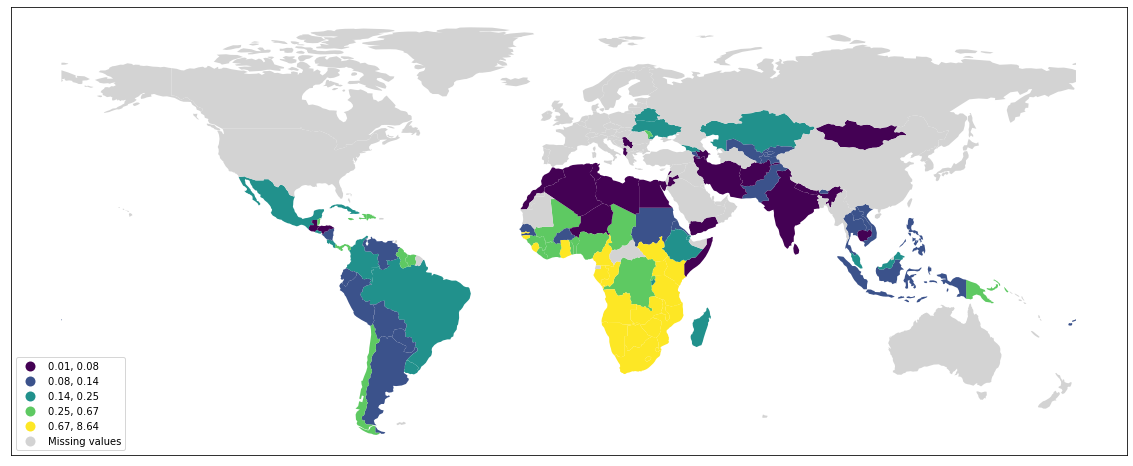

In [3]:
# Map HIV incidence rate 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
map_data = world.merge(df, how="left", left_on=['iso_a3'], right_on=['id'])
map_data.head(5)

plot = map_data.plot(column='hiv_rate', 
            cmap='viridis',       
#             edgecolor='black',
            legend=True,
            legend_kwds={'loc': "lower left"},
            scheme="quantiles",
            figsize=(20, 15),
            missing_kwds={
                "color": "lightgrey",
                "label": "Missing values",
              })
plot.axes.xaxis.set_visible(False)
plot.axes.yaxis.set_visible(False)
fig = plot.get_figure()
# fig.savefig("graph-map.pdf", bbox_inches='tight')


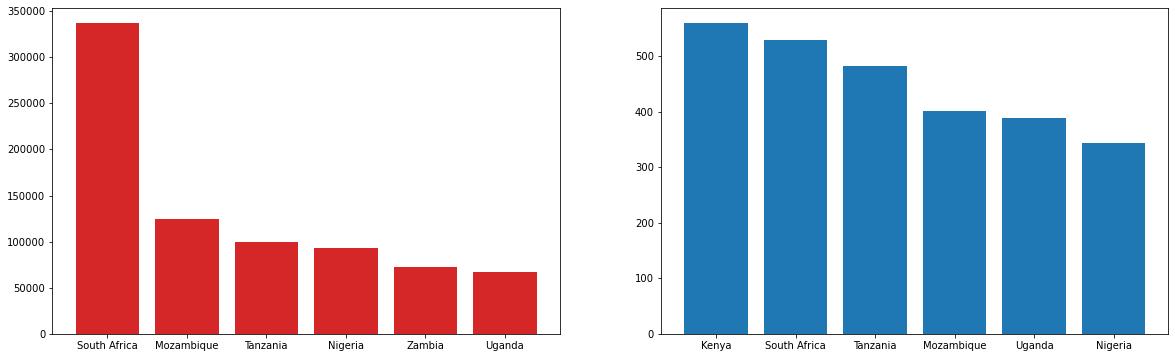

In [4]:
# Barplots: number of cases and largest recipents

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(20)
plt.rc('axes', titlesize=17)
plt.rc('axes', labelsize=17)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=17) 

df_cases = df.loc[:, ['country', 'hiv_cases']]
# df_cases.loc[len(df.index)] = ['Total', np.sum(df_cases['hiv_cases'].values)] 
df_cases = df_cases.sort_values(by='hiv_cases', ascending=False)
cases = df_cases['hiv_cases'][0:6]
countries = df_cases['country'][0:6]


ax1.bar(countries, cases, color='tab:red')
ax1.set_title("")

df_aid = df.loc[:, ['country', 'hiv_aid']]
# df_aid.loc[len(df.index)] = ['Total', np.sum(df_aid['hiv_aid'].values)] 
df_aid = df_aid.sort_values(by='hiv_aid', ascending=False)
aid = df_aid['hiv_aid'][0:6]
recipients = df_aid['country'][0:6]

ax2.bar(recipients, aid, color='tab:blue')
ax2.set_title("")
plt.show()

# fig.savefig("graph-barplots.pdf", bbox_inches='tight')


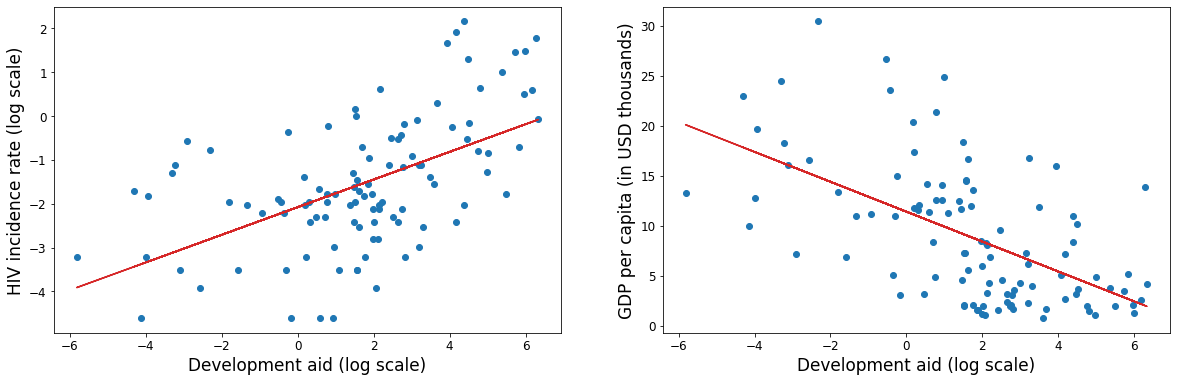

In [5]:
# Scatter plot HIV rate vs. development aid

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(20)
plt.rc('axes', titlesize=17)
plt.rc('axes', labelsize=17)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=17) 

x = np.log(df['hiv_aid'])
y = np.log(df['hiv_rate'])
a, b = np.polyfit(x, y, 1)

ax1.scatter(x, y)
ax1.plot(x, a*x + b, color='tab:red')
ax1.set(xlabel=r'Development aid (log scale)', ylabel="HIV incidence rate (log scale)")
ax1.set_title("")

x = np.log(df['hiv_aid'])
y = df['gdp_per_cap_PPP']
a, b = np.polyfit(x, y, 1)

ax2.scatter(x, y)
ax2.plot(x, a*x + b, color='tab:red')
ax2.set(xlabel=r'Development aid (log scale)', ylabel="GDP per capita (in USD thousands)")
ax2.set_title("")
plt.show()

# plt.savefig("graph-scatterplot.pdf", bbox_inches='tight')


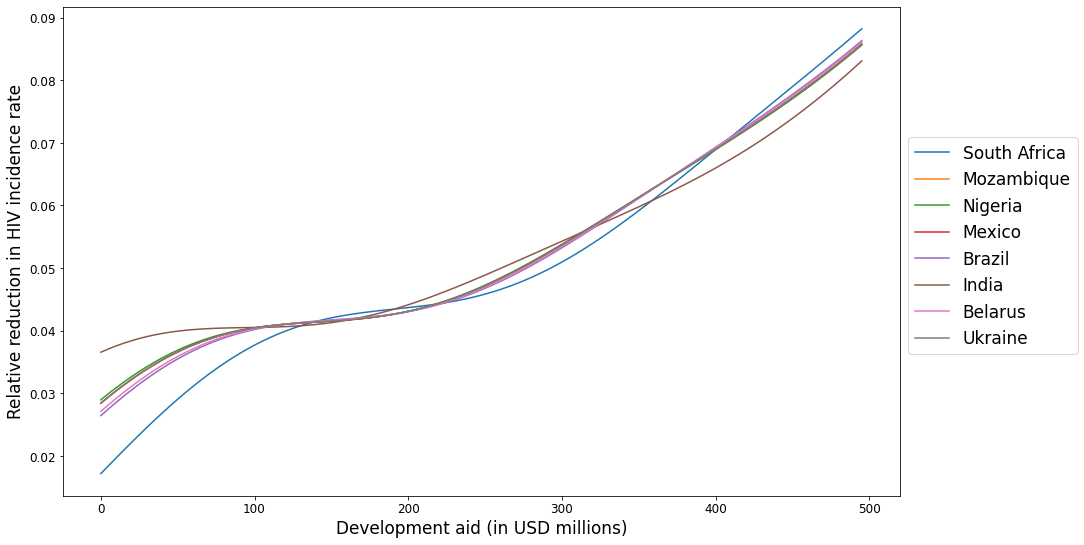

In [6]:
# Plot treatment response curves for come countries

GPS_mod = np.load('GPS_mod.npz')
b_coef = GPS_mod['b_coef']
sig_hat = GPS_mod['sig_hat']
a_coef = GPS_mod['a_coef']
data_test_bae = GPS_mod['data_test_bae']

fig, ax = plt.subplots(1, 1)
fig.set_figheight(9)
fig.set_figwidth(15)
plt.rc('axes', titlesize=17)
plt.rc('axes', labelsize=17)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=17) 

# total_cases = df['hiv_cases'].values
# n_ctry = 5
# ind = (-total_cases).argsort()[:n_ctry]
# countries = df['country'].iloc[ind]

countries = ['South Africa', 'Mozambique', 'Nigeria', 'Mexico', 'Brazil', 'India', 'Belarus', 'Ukraine']
for country in countries:
    # create data
    a = np.arange(500, step=5)
    y = np.empty(len(a))
    for i in range(len(a)):
        country_ind = np.where(df['country'] == country)[0]
        y[i] = GPS_pred(np.concatenate(([[a[i]]], data_test_bae[country_ind, 2:]), axis=1) , b_coef, sig_hat, a_coef)

    # plot lines
    ax.plot(a, y, label = country)
ax.set(xlabel=r'Development aid (in USD millions)', ylabel="Relative reduction in HIV incidence rate")
ax.legend(bbox_to_anchor=(1, 0.75), loc='upper left')
plt.show()

# plt.savefig("graph-tr_curves.pdf", bbox_inches='tight')


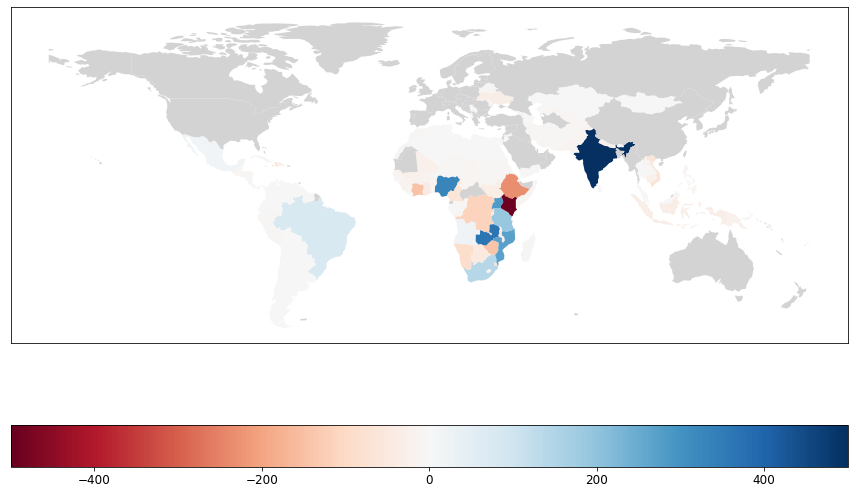

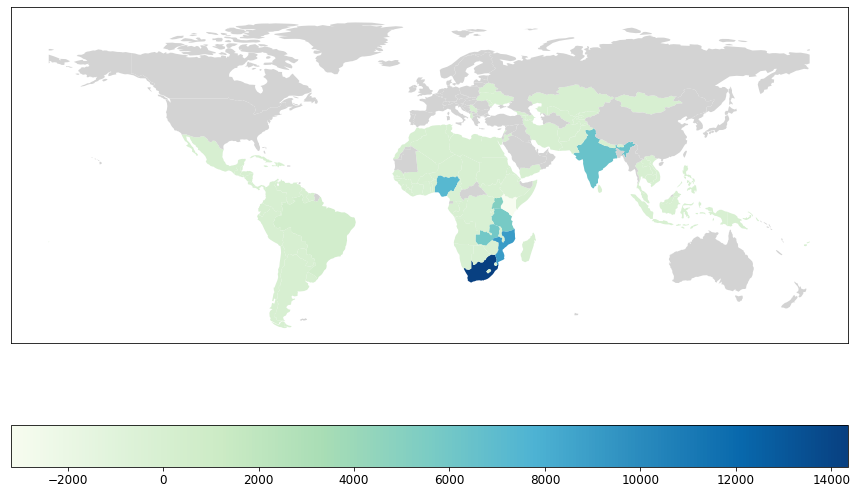

In [7]:
# Visualize optimal allocation

A_opt = np.load('A_opt.npz')['A_opt']
GPS_mod = np.load('GPS_mod.npz')
b_coef = GPS_mod['b_coef']
sig_hat = GPS_mod['sig_hat']
a_coef = GPS_mod['a_coef']
data_test_bae = GPS_mod['data_test_bae']

df = pd.read_csv('data/HIV_data.csv') 
year = 2016
df = df[df['year'] == year]
hiv_rate_previous = df['hiv_rate'].values

df = pd.read_csv('data/HIV_data.csv')
year = 2017
df = df[df['year'] == year]
population = df['population'].values

df['hiv_aid_opt'] = A_opt
df['aid_difference'] = df['hiv_aid_opt'] - df['hiv_aid']
df['exp_tot_cases_current'] = (1-GPS_pred(data_test_bae[:, 1:] , b_coef, sig_hat, a_coef))*hiv_rate_previous*population*1000
df['exp_tot_cases_optimal'] = (1-GPS_pred(np.concatenate((A_opt.reshape((len(A_opt),1)), data_test_bae[:, 2:]), axis=1) , b_coef, sig_hat, a_coef))*hiv_rate_previous*population*1000
df['exp_tot_cases_reduction'] = df['exp_tot_cases_current'] - df['exp_tot_cases_optimal']
df.head(15)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
map_data = world.merge(df, how="left", left_on=['iso_a3'], right_on=['id'])
map_data.head(5)

plot2 = map_data.plot(column='aid_difference', 
              missing_kwds={'color': 'lightgrey'},
              legend_kwds={'label': "",
                           'orientation': "horizontal"},              
              legend=True,
              figsize=(15, 10),
              vmin=-500,
              vmax=500,
              cmap='RdBu')
plot2.axes.xaxis.set_visible(False)
plot2.axes.yaxis.set_visible(False)
fig2 = plot2.get_figure()
# fig2.savefig("graph-map2.pdf", bbox_inches='tight')

plot3 = map_data.plot(column='exp_tot_cases_reduction', 
              missing_kwds={'color': 'lightgrey'},
              legend_kwds={'label': "",
                           'orientation': "horizontal"},
              legend=True,
              figsize=(15, 10),
              cmap='GnBu')
plot3.axes.xaxis.set_visible(False)
plot3.axes.yaxis.set_visible(False)
fig3 = plot3.get_figure()
# fig3.savefig("graph-map3.pdf", bbox_inches='tight')


In [8]:
# Overview of covariates

# Real world - test
df = pd.read_csv('data/HIV_data.csv')
year = 2017
df = df[df['year'] == year]
df = df.loc[:, ['hiv_reduction', 'hiv_aid','gdp_per_cap_PPP','gdp_growth','inflation','unemployment',
                'population', 'fertility','maternal_mort','infant_mort', 'fdi', 'electricity',
                'life_exp','school_enr', 'tuberculosis', 'undernourishment']]
df.describe()

,hiv_reduction,hiv_aid,gdp_per_cap_PPP,gdp_growth,inflation,unemployment,population,fertility,maternal_mort,infant_mort,fdi,electricity,life_exp,school_enr,tuberculosis,undernourishment
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.032550,50.120621,8.872733,3.812069,7.750452,7.833448,41.662004,3.254295,241.209524,30.946667,3290.619320,73.828879,68.496161,1.036813,162.292381,13.906286
std,0.078541,112.857807,6.789367,3.527058,18.721624,6.227674,135.750569,1.332473,259.076084,20.364246,8750.618053,29.832030,6.904248,0.127265,158.959300,11.651525
min,-0.500000,0.002983,0.773573,-5.071796,-1.537100,0.140000,0.375775,1.259000,2.000000,2.700000,-7397.295409,4.200000,52.947000,0.684745,5.200000,2.500000
25%,0.000000,1.599702,3.153299,2.113129,2.796373,3.600000,5.110701,2.219000,43.000000,13.200000,200.902719,48.472744,63.290000,0.983680,43.000000,5.900000
50%,0.029412,6.348344,7.257812,3.815702,4.378399,5.650000,11.980960,2.849000,144.000000,26.600000,888.835228,90.295815,69.509000,1.033807,99.000000,9.100000
75%,0.080402,25.465566,12.770964,5.069786,7.636113,11.180000,31.104655,4.359000,375.000000,43.500000,2686.509353,99.635490,74.292000,1.087478,233.000000,20.000000
max,0.173077,559.896750,30.446850,26.680903,187.851630,27.040001,1338.676779,7.001000,1150.000000,87.300000,68885.491315,100.000000,79.914000,1.454889,738.000000,58.700000


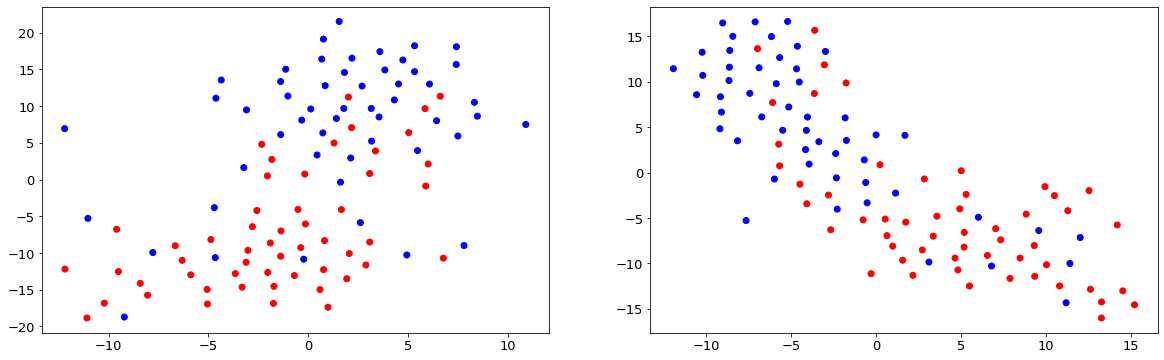

In [10]:
# Visualize representation

# TSNE on original data

# Real world - test
df = pd.read_csv('data/HIV_data.csv')
year = 2017
df = df[df['year'] == year]

# Prepare real world data
X = df.iloc[:, 5:-2].to_numpy()
A = df.iloc[:, 4].to_numpy()
Y = df.iloc[:, -1].to_numpy()

n = X.shape[0]
p = X.shape[1]

data2 = np.concatenate([Y.reshape(n,1), A.reshape(n,1), X],axis=1)

# Data standardization: min-max scaler
scaler = MinMaxScaler()
data_scaled2 = scaler.fit_transform(data2[:,2:])
data_test = np.concatenate([data2[:,0:2], data_scaled2], axis=1)
data_tsne_original = data_test[:,2:]
    
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results_original = tsne.fit_transform(data_tsne_original)

# TSNE on balnced data

# Real-world - train
df = pd.read_csv('data/HIV_data.csv') 
year = 2016
df = df[df['year'] == year]
hiv_rate_previous = df['hiv_rate'].values

# Prepare real world data
X = df.iloc[:, 5:-2].to_numpy()
A = df.iloc[:, 4].to_numpy()
Y = df.iloc[:, -1].to_numpy()

n = X.shape[0]
p = X.shape[1]

data = np.concatenate([Y.reshape(n,1), A.reshape(n,1), X],axis=1)

# Data standardization: min-max scaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[:,2:])
data_train = np.concatenate([data[:,0:2], data_scaled], axis=1)

# Real world - test
df = pd.read_csv('data/HIV_data.csv')
year = 2017
df = df[df['year'] == year]
population = df['population'].values

# Prepare real world data
X = df.iloc[:, 5:-2].to_numpy()
A = df.iloc[:, 4].to_numpy()
Y = df.iloc[:, -1].to_numpy()

n = X.shape[0]
p = X.shape[1]

data2 = np.concatenate([Y.reshape(n,1), A.reshape(n,1), X],axis=1)

# Data standardization: min-max scaler
scaler = MinMaxScaler()
data_scaled2 = scaler.fit_transform(data2[:,2:])
data_test = np.concatenate([data2[:,0:2], data_scaled2], axis=1)

# Hyperpar list
hyper_opt_list = open("hyper_opt_list_HIV2017.txt", "r")
hyper_opt_list = hyper_opt_list.read()
hyper_opt = ast.literal_eval(hyper_opt_list)
opt_hyperpars = hyper_opt[-2]

# Set all seeds
np.random.seed(123)
torch.manual_seed(123)

# Estimate model
data_train_bae, mod_BAE = BAE(data_train, opt_hyperpars)    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  
X = torch.from_numpy(data_test[:,2:].astype(np.float32))
X = X.to(device)
X_reduced, _, _ = mod_BAE(X)
X_reduced = X_reduced.cpu().detach().numpy()
data_test_bae = np.concatenate([data_test[:,0:2],X_reduced], axis=1)                                     
data_tsne_bae = data_test_bae[:,2:]

tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results_bae = tsne.fit_transform(data_tsne_bae)

# # Aid volume group
A = data_test[:,1]
n_groups = 2
sep = np.round(np.quantile(A, q=[0, 0.5, 1]))
l_enc = np.empty((n,n_groups))
for i in range(n):
    for j in range(n_groups):
        if A[i] >= sep[j] and A[i] <= sep[j+1]:
            l_enc[i,j] = 1
        else:
            l_enc[i,j] = 0
A_group = np.empty(n)
for i in range(n):
    A_group[i] = np.where(l_enc[i,:] == 1)[0]
    
# Visualize representation

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(20)
plt.rc('axes', titlesize=17)
plt.rc('axes', labelsize=17)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=17) 

ax1.scatter(x=tsne_results_original[:,0], y=tsne_results_original[:,1],
           c=A_group, cmap='bwr')

ax1.set(xlabel='', ylabel="")
ax1.set_title("")

ax2.scatter(x=tsne_results_bae[:,0], y=tsne_results_bae[:,1],
           c=A_group, cmap='bwr')

ax2.set(xlabel='', ylabel="")
ax2.set_title("")

plt.show()

#fig.savefig("tsne.pdf", bbox_inches='tight')

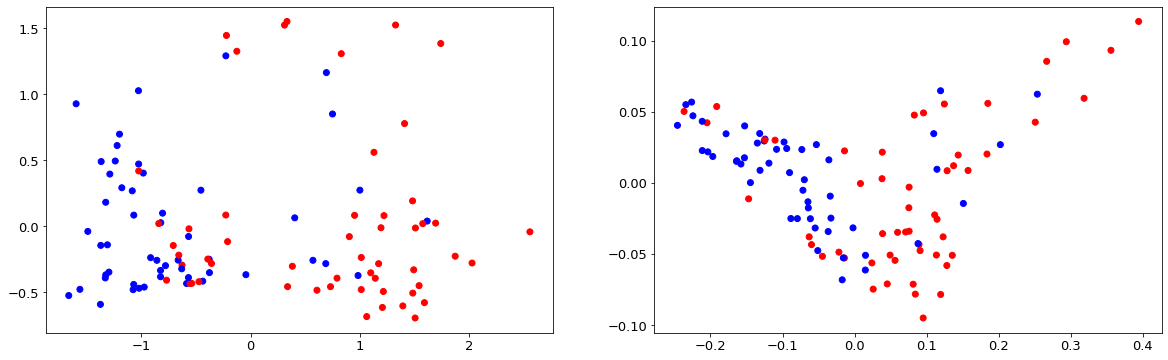

In [11]:
# Visualize representation

# Isomap on original data

# Real world - test
df = pd.read_csv('data/HIV_data.csv')
year = 2017
df = df[df['year'] == year]

# Prepare real world data
X = df.iloc[:, 5:-2].to_numpy()
A = df.iloc[:, 4].to_numpy()
Y = df.iloc[:, -1].to_numpy()

n = X.shape[0]
p = X.shape[1]

data2 = np.concatenate([Y.reshape(n,1), A.reshape(n,1), X],axis=1)

# Data standardization: min-max scaler
scaler = MinMaxScaler()
data_scaled2 = scaler.fit_transform(data2[:,2:])
data_test = np.concatenate([data2[:,0:2], data_scaled2], axis=1)
data_tsne_original = data_test[:,2:]
    
iso = Isomap(n_components=2)
iso_results_original = iso.fit_transform(data_tsne_original)

# Isomap on balnced data

# Real-world - train
df = pd.read_csv('data/HIV_data.csv') 
year = 2016
df = df[df['year'] == year]
hiv_rate_previous = df['hiv_rate'].values

# Prepare real world data
X = df.iloc[:, 5:-2].to_numpy()
A = df.iloc[:, 4].to_numpy()
Y = df.iloc[:, -1].to_numpy()

n = X.shape[0]
p = X.shape[1]

data = np.concatenate([Y.reshape(n,1), A.reshape(n,1), X],axis=1)

# Data standardization: min-max scaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[:,2:])
data_train = np.concatenate([data[:,0:2], data_scaled], axis=1)

# Real world - test
df = pd.read_csv('data/HIV_data.csv')
year = 2017
df = df[df['year'] == year]
population = df['population'].values

# Prepare real world data
X = df.iloc[:, 5:-2].to_numpy()
A = df.iloc[:, 4].to_numpy()
Y = df.iloc[:, -1].to_numpy()

n = X.shape[0]
p = X.shape[1]

data2 = np.concatenate([Y.reshape(n,1), A.reshape(n,1), X],axis=1)

# Data standardization: min-max scaler
scaler = MinMaxScaler()
data_scaled2 = scaler.fit_transform(data2[:,2:])
data_test = np.concatenate([data2[:,0:2], data_scaled2], axis=1)

# Hyperpar list
hyper_opt_list = open("hyperpars/hyper_opt_list_HIV2017.txt", "r")
hyper_opt_list = hyper_opt_list.read()
hyper_opt = ast.literal_eval(hyper_opt_list)
opt_hyperpars = hyper_opt[-2]

# Set all seeds
np.random.seed(123)
torch.manual_seed(123)

# Estimate model
data_train_bae, mod_BAE = BAE(data_train, opt_hyperpars)    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  
X = torch.from_numpy(data_test[:,2:].astype(np.float32))
X = X.to(device)
X_reduced, _, _ = mod_BAE(X)
X_reduced = X_reduced.cpu().detach().numpy()
data_test_bae = np.concatenate([data_test[:,0:2],X_reduced], axis=1)                                     
data_tsne_bae = data_test_bae[:,2:]

iso = Isomap(n_components=2)
iso_results_bae = iso.fit_transform(data_tsne_bae)

# Aid volume group
A = data_test[:,1]
n_groups = 2
sep = np.round(np.quantile(A, q=[0, 0.5, 1]))
l_enc = np.empty((n,n_groups))
for i in range(n):
    for j in range(n_groups):
        if A[i] >= sep[j] and A[i] <= sep[j+1]:
            l_enc[i,j] = 1
        else:
            l_enc[i,j] = 0
A_group = np.empty(n)
for i in range(n):
    A_group[i] = np.where(l_enc[i,:] == 1)[0]
    
# Visualize representation

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(20)
plt.rc('axes', titlesize=17)
plt.rc('axes', labelsize=17)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=17) 

ax1.scatter(x=iso_results_original[:,0], y=iso_results_original[:,1],
           c=A_group, cmap='bwr')

ax1.set(xlabel='', ylabel="")
ax1.set_title("")

ax2.scatter(x=iso_results_bae[:,0], y=iso_results_bae[:,1],
           c=A_group, cmap='bwr')

ax1.set(xlabel='', ylabel="")
ax1.set_title("")

plt.show()

#fig.savefig("isomap.pdf", bbox_inches='tight')

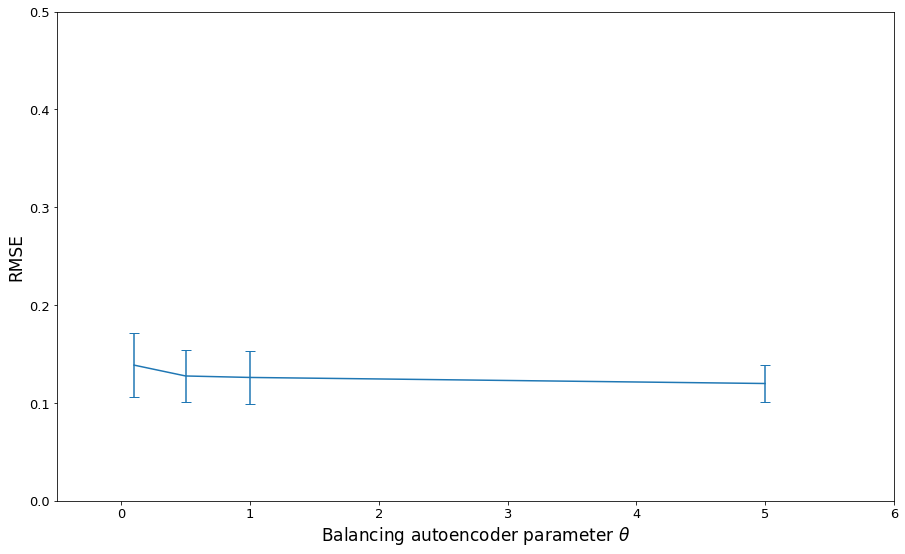

In [12]:
# Visualize Sensitivity

data_plot1 = pd.read_csv('res_HIV2017_sensitivity_alpha_bae.csv')

fig, ax = plt.subplots(1, 1)
fig.set_figheight(9)
fig.set_figwidth(15)
plt.rc('axes', titlesize=17)
plt.rc('axes', labelsize=17)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=17) 

x = np.array([0.1, 0.5, 1, 5])
y = np.array([data_plot1.iloc[0,10], data_plot1.iloc[1,10], data_plot1.iloc[2,10], data_plot1.iloc[3,10]])
yerr = np.array([data_plot1.iloc[0,11], data_plot1.iloc[1,11], data_plot1.iloc[2,11], data_plot1.iloc[3,11]])
ax.errorbar(x, y, yerr=yerr, capsize=5, color='tab:blue')

ax.set(xlabel=r'Balancing autoencoder parameter $\theta$', ylabel="RMSE")
ax.set_xlim(-0.5, 6)
ax.set_ylim(0, 0.5)
ax.set_title("")

plt.show()

#fig.savefig("sen_theta.pdf", bbox_inches='tight')

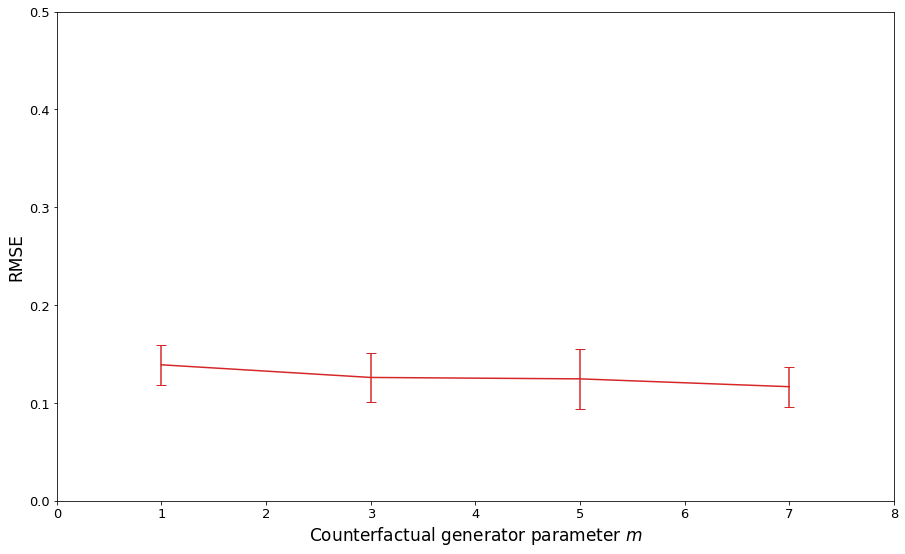

In [13]:
# Visualize Sensitivity

data_plot2 = pd.read_csv('res_HIV2017_sensitivity_m_scw.csv')

fig, ax = plt.subplots(1, 1)
fig.set_figheight(9)
fig.set_figwidth(15)
plt.rc('axes', titlesize=17)
plt.rc('axes', labelsize=17)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=17) 

x = np.array([1, 3, 5, 7])
y = np.array([data_plot2.iloc[0,10], data_plot2.iloc[1,10], data_plot2.iloc[2,10], data_plot2.iloc[3,10]])
yerr = np.array([data_plot2.iloc[0,11], data_plot2.iloc[1,11], data_plot2.iloc[2,11], data_plot2.iloc[3,11]])
ax.errorbar(x, y, yerr=yerr, capsize=5, color='tab:red')

ax.set_xlim(0, 8)
ax.set_ylim(0, 0.5)
ax.set(xlabel=r'Counterfactual generator parameter $m$', ylabel="RMSE")
ax.set_title("")

plt.show()

#fig.savefig("sen_m.pdf", bbox_inches='tight')